## Exemples

In [2]:
import matplotlib.pyplot as plt



circle = plt.Circle((0, 0), radius=0.75, fc='y')
plt.gca().add_patch(circle)

plt.axis('scaled')
plot()



[]

https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
https://github.com/zingale/astro_animations/blob/master/solar_system_motion/parallax/parallax.py

---

https://fiftyexamples.readthedocs.io/en/latest/gravity.html

## **MON** travail (Yakumo KUNIMOTO)

C:\Python34\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


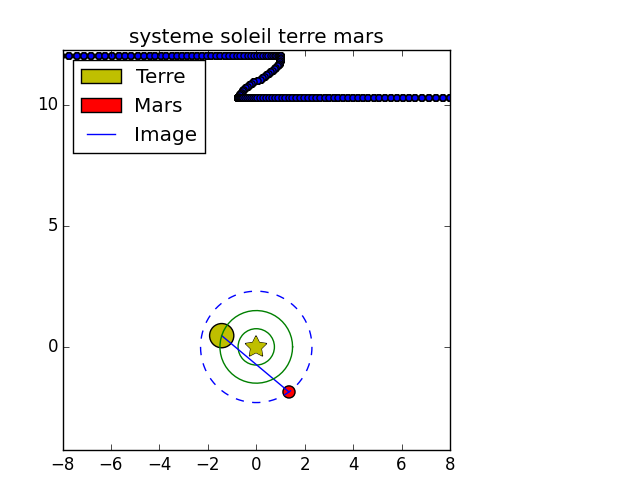

In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

v1=2
v2=1
d1=1.5
d2=2.3
d3=10

class ParallaxScene:
    """
    We'll treat the entire collection of the Earth/Sun, foreground
    star, and background star as an object.  The only real thing that we
    need to change from frame to frame is the location of Earth
    """

    def __init__(self):

        # start Earth on the x-axis, on the opposite side of the field of
        # stars we will reference -- we accomplish this through a phase
        self.phi = math.pi
        
        # number of steps per year (make this a number divisible by 4)
        self.nsteps_year = 360   

        # angular velocity (radians per year)
        self.omega = 2.0*math.pi/1.0          

        # semi-major axis of planet Earth
        self.a_E = d2       

        # position of Earth over the year
        omega_t = np.arange(self.nsteps_year)*2.0*math.pi/(self.nsteps_year-1)
        self.x_orbit = self.a_E*np.cos(omega_t + self.phi)
        self.y_orbit = self.a_E*np.sin(omega_t + self.phi)

        # foreground star
        self.x_fg = 3.5
        self.y_fg = 0.0


    def draw_sun_and_orbit(self):

        # draw the Sun
        plt.scatter([0], [0], s=250, marker=(5,1), color="k")
        plt.scatter([0], [0], s=200, marker=(5,1), color="y")

        # plot the orbit
        plt.plot(self.x_orbit, self.y_orbit, "b--")
        



A=ParallaxScene()


fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

patch = plt.Circle((5, -5), 0.5, fc='y', label='Terre')
patch2 = plt.Circle((5, -5), 0.25, fc='r',label='Mars')
line, = plot([],[], label='Image') 

b=12
T=False


def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    patch2.center = (5, 5)
    ax.add_patch(patch2)
    line.set_data([],[])
    
    return patch, patch2, line

def animate(i):
    global b,T
    x, y = patch.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    patch.center = (x, y)
    v, w = patch2.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    patch2.center = (v, w)
    a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
    line.set_data([x,v],[y,w])
    if math.acos((x*v+w*y)/(d1*d2))<=(math.pi)/2 and T==True:
        if (b-d1 * np.cos(np.radians(i+5)*v1)+d1 * np.sin(np.radians(i+5)*v1)*(d2*np.cos(np.radians(i+5)*v2)-d1 * np.cos(np.radians(i+5)*v1))/(d2 * np.sin(np.radians(i+5)*v2)-d1 * np.sin(np.radians(i+5)*v1)))/((d2*np.cos(np.radians(i+5)*v2)-d1 * np.cos(np.radians(i+5)*v1))/(d2 * np.sin(np.radians(i+5)*v2)-d1 * np.sin(np.radians(i+5)*v1)))-a<0:
            b=b-0.06
            a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
        line.set_data([x,a],[y,b])
        plt.scatter(a,b)
    elif math.acos((x*v+w*y)/(d1*d2))>(math.pi)/2:
        line.set_data([x,v],[y,w])
        b=12
        T=True
    return patch, patch2, line





anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=10,
                               blit=True)


theta = linspace(0, 2*pi)

x = d1*cos(theta)
y = d1*sin(theta)
plot(x, y)

circle = plt.Circle((0, 0), radius=0.75, fc='none', color="green")
plt.gca().add_patch(circle)

A.draw_sun_and_orbit()

pylab.title('systeme soleil terre mars')

plt.legend(loc='upper left', handles=[patch, patch2,line])
pylab.xlabel('10^8m')
axis('equal')
xlim(-8,8)
ylim(-5,13)
plt.show()

## Comparaison Terre-Mars

---

|                                 | Terre (symbole: ⊕)| Mars  (symbole: ♂)|
| -------------                   |:-------------:    | :---------:        |
| Masse (㎏)                      | $6×10^{24}$       | $6×10^{23}$        |
| demi grand-axe (㎞)             | $1,5×10^8$        | $2,3×10^8$         |
| Exentricité                     | 0,01              | 0,09               |
| vitesse orbitale moyenne (㎞/s) | 30                | 24                 |
| période de révolution (jours)   | 365,25            | 686,96             |
| période synodique (jours)       | -                 | 779,96             |

Masse du Soleil :   $2×10^{30}$ ㎏
    
Période synodique de Mars: c'est le temps mis par Mars pour revenir à la même configuration Terre-Mars-Soleil, c'est-à-dire à la même place dans le ciel par rapport au Soleil, vu de la Terre.

 > [Wiki Terre](https://fr.wikipedia.org/wiki/Terre)       [Wiki Mars](https://fr.wikipedia.org/wiki/Mars_(planète) 

C:\Python34\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


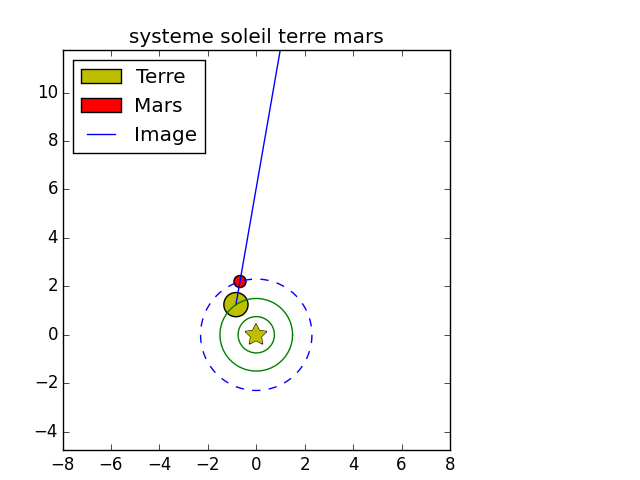

In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

v1=2
v2=1
d1=1.5
d2=2.3
d3=10

class ParallaxScene:
    """
    We'll treat the entire collection of the Earth/Sun, foreground
    star, and background star as an object.  The only real thing that we
    need to change from frame to frame is the location of Earth
    """

    def __init__(self):

        # start Earth on the x-axis, on the opposite side of the field of
        # stars we will reference -- we accomplish this through a phase
        self.phi = math.pi
        
        # number of steps per year (make this a number divisible by 4)
        self.nsteps_year = 360   

        # angular velocity (radians per year)
        self.omega = 2.0*math.pi/1.0          

        # semi-major axis of planet Earth
        self.a_E = d2       

        # position of Earth over the year
        omega_t = np.arange(self.nsteps_year)*2.0*math.pi/(self.nsteps_year-1)
        self.x_orbit = self.a_E*np.cos(omega_t + self.phi)
        self.y_orbit = self.a_E*np.sin(omega_t + self.phi)

        # foreground star
        self.x_fg = 3.5
        self.y_fg = 0.0


    def draw_sun_and_orbit(self):

        # draw the Sun
        plt.scatter([0], [0], s=250, marker=(5,1), color="k")
        plt.scatter([0], [0], s=200, marker=(5,1), color="y")

        # plot the orbit
        plt.plot(self.x_orbit, self.y_orbit, "b--")
        



A=ParallaxScene()


fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

patch = plt.Circle((5, -5), 0.5, fc='y', label='Terre')
patch2 = plt.Circle((5, -5), 0.25, fc='r',label='Mars')
line, = plot([],[], label='Image') 

b=12
T=False


def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    patch2.center = (5, 5)
    ax.add_patch(patch2)
    line.set_data([],[])
    
    return patch, patch2, line

def animate(i):
    global b,T
    x, y = patch.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    patch.center = (x, y)
    v, w = patch2.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    patch2.center = (v, w)
    a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
    line.set_data([x,v],[y,w])
    if math.acos((x*v+w*y)/(d1*d2))<=(math.pi)/2 and T==True:
        if (b-d1 * np.cos(np.radians(i+5)*v1)+d1 * np.sin(np.radians(i+5)*v1)*(d2*np.cos(np.radians(i+5)*v2)-d1 * np.cos(np.radians(i+5)*v1))/(d2 * np.sin(np.radians(i+5)*v2)-d1 * np.sin(np.radians(i+5)*v1)))/((d2*np.cos(np.radians(i+5)*v2)-d1 * np.cos(np.radians(i+5)*v1))/(d2 * np.sin(np.radians(i+5)*v2)-d1 * np.sin(np.radians(i+5)*v1)))-a<0:
            b=b-0.06
            a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
        line.set_data([x,a],[y,b])
    elif math.acos((x*v+w*y)/(d1*d2))>(math.pi)/2:
        line.set_data([x,v],[y,w])
        b=12
        T=True
    return patch, patch2, line





anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=10,
                               blit=True)


theta = linspace(0, 2*pi)

x = d1*cos(theta)
y = d1*sin(theta)
plot(x, y)

circle = plt.Circle((0, 0), radius=0.75, fc='none', color="green")
plt.gca().add_patch(circle)

A.draw_sun_and_orbit()

pylab.title('systeme soleil terre mars')

plt.legend(loc='upper left', handles=[patch, patch2,line])
pylab.xlabel('10^8m')
axis('equal')
xlim(-8,8)
ylim(-5,12)
plt.show()